In [2]:
import torch
import transformers
import accelerate
import sentence_transformers

print("Environment Check Passed!")
print(f"PyTorch: {torch.__version__}")       
print(f"Transformers: {transformers.__version__}") 
print(f"Accelerate: {accelerate.__version__}")     
print(f"Sentence-Transformers: {sentence_transformers.__version__}") 

Environment Check Passed!
PyTorch: 2.5.1+cu121
Transformers: 4.57.3
Accelerate: 1.12.0
Sentence-Transformers: 5.2.0


FAISS index loaded from /nobackup/riyad/NAVIG/NaviClues/Navig/guidebook/index.index
Input is an image path, loading image...
Top 5 similar images:


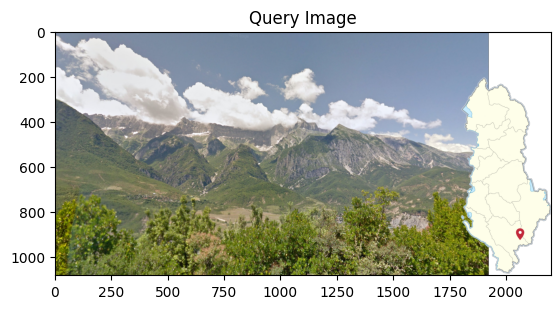

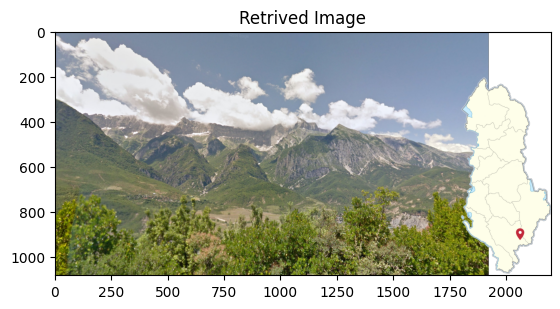

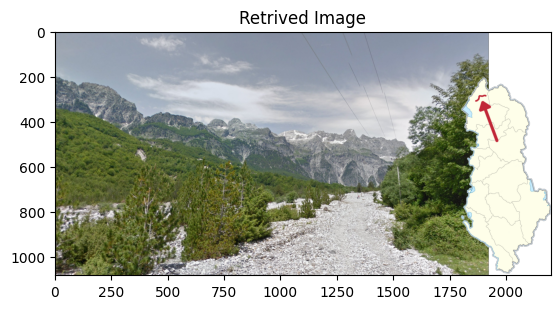

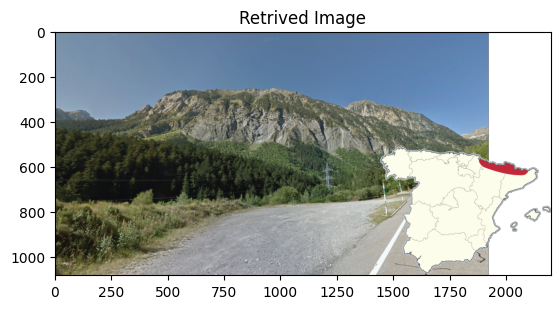

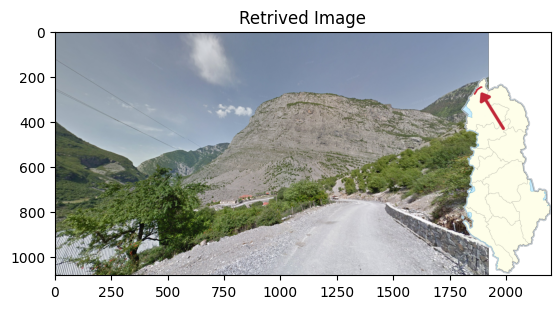

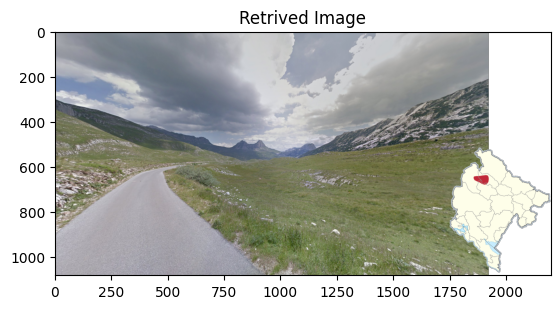

In [4]:
import faiss
import os
import numpy as np
from PIL import Image
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt

def load_faiss_index(index_path):
    index = faiss.read_index(index_path)
    print(f"FAISS index loaded from {index_path}")
    with open(index_path + '.paths', 'r') as f:
        image_paths = [line.strip() for line in f.readlines()]
    
    return index, image_paths

def retrieve_similar_images(query,model, index, image_paths, top_k=5):
    if query.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print("Input is an image path, loading image...")
        image = Image.open(query)
    query_embedding = model.encode(image)
    query_vector = np.array([query_embedding]).astype(np.float32)
    distances, indices = index.search(query_vector, top_k)
    
    similar_images = []
    for idx in indices[0]:
        similar_images.append(image_paths[idx])
    
    return similar_images


    
model = SentenceTransformer('clip-ViT-B-32')
index_path = "/nobackup/riyad/NAVIG/NaviClues/Navig/guidebook/index.index"
index, image_paths = load_faiss_index(index_path)

query_image_path = "/nobackup/riyad/NAVIG/data/sample_image/Albania_28.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVIG/data"
print("Top 5 similar images:")
query_image = Image.open(query_image_path)
plt.title("Query Image")
plt.imshow(query_image)
plt.show()
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.title("Retrived Image")
    plt.imshow(img)
    plt.show()

In [23]:
!pip install faiss-cpu sentence-transformers pillow

In [20]:
#!pip install matplotlib
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#pip install "transformers>=4.46.0" "accelerate>=1.0.0" \
            # "sentence-transformers>=3.2.0" \
            # "datasets>=3.0.0" \
            # "tokenizers>=0.20.0" \
            # "protobuf" \
            # "scipy" \
            # "pillow"

Input is an image path, loading image...


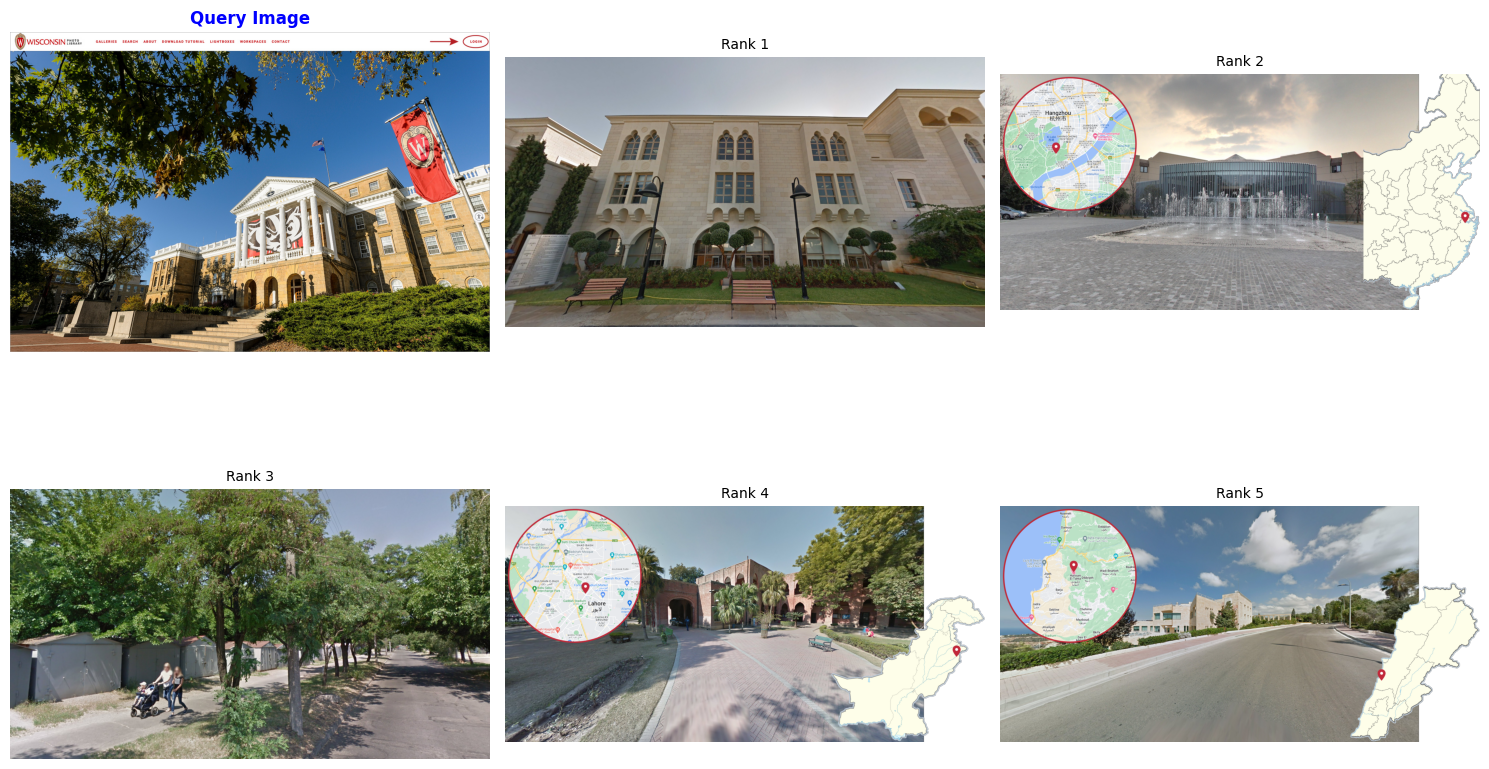

In [24]:
query_image_path = "/nobackup/riyad/NAVIG/data/sample_image/uwmadison_img.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVIG/data"

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
query_img = Image.open(query_image_path)
axes[0].imshow(query_img)
axes[0].set_title("Query Image", color='blue', fontsize=12, fontweight='bold')
axes[0].axis('off')

# --- 2. Plot Retrieved Images (Next 5 slots) ---
for i, img_rel_path in enumerate(similar_images):
    # Construct full path
    full_path = os.path.join(base_dir, img_rel_path)
    
    try:
        img = Image.open(full_path)
        
        # Plot in the next available subplot (index i + 1)
        ax = axes[i + 1]
        ax.imshow(img)
        ax.set_title(f"Rank {i+1}", fontsize=10)
        ax.axis('off')
        
    except Exception as e:
        print(f"Could not load image {full_path}: {e}")

# --- 3. Final Layout Adjustments ---
plt.tight_layout()
plt.show()

Input is an image path, loading image...
Top 5 similar images:


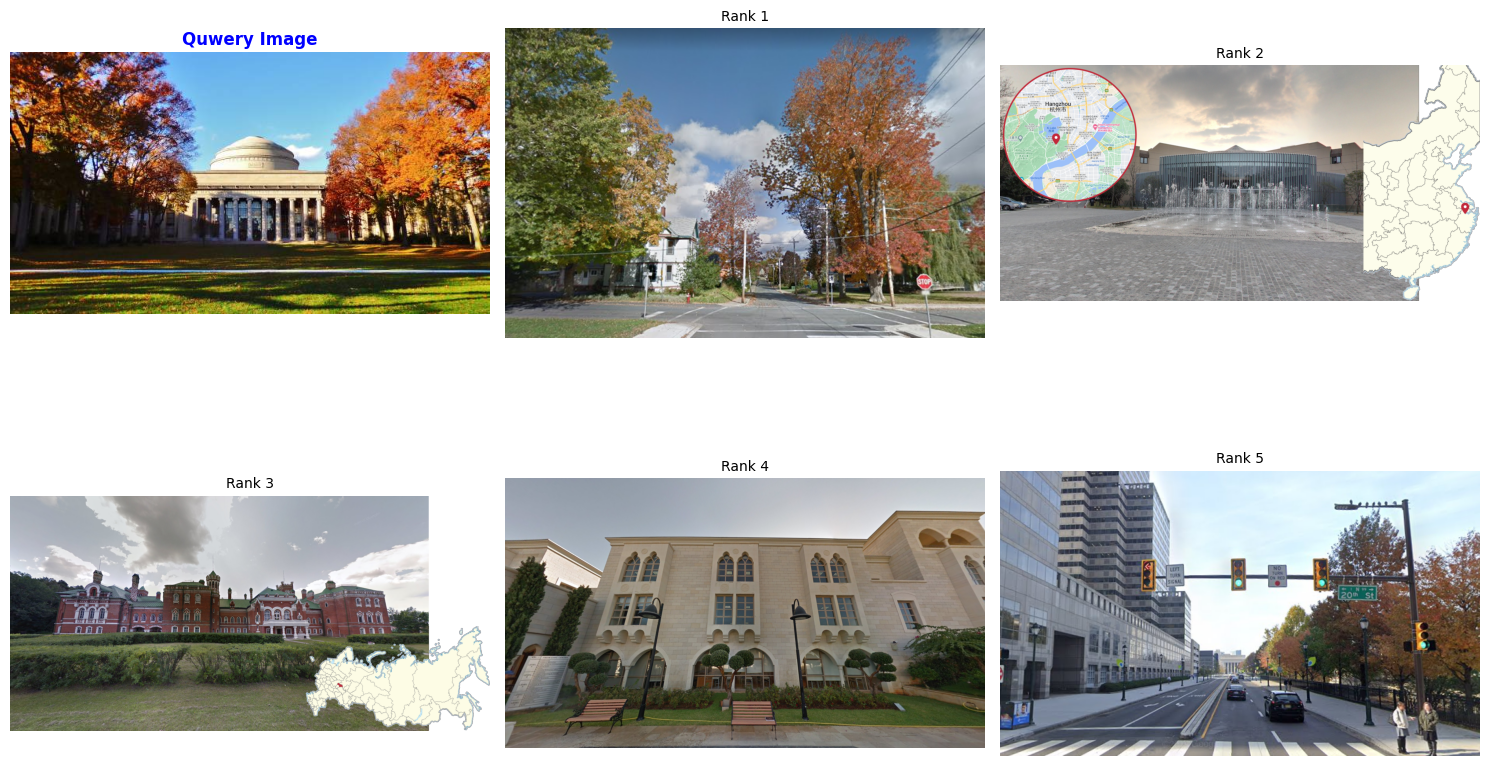

In [28]:
query_image_path = "/nobackup/riyad/NAVIG/data/sample_image/mit_img.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVIG/data"
print("Top 5 similar images:")
fig, axes = plt.subplots(2,3, figsize = (15,10))
axes = axes.flatten()
query_img = Image.open(query_image_path)
axes[0].imshow(query_img)
axes[0].set_title("Quwery Image", color = "blue", fontsize = 12, fontweight = 'bold')
axes[0].axis('off')

for i, img_path in enumerate(similar_images):
    try:
        img_path = os.path.join(base_dir, img_path)
        img = Image.open(img_path)
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"Rank {i+1}", fontsize=10)
        axes[i+1].axis('off')
    except Exception as e:
        print('candidate not found',e)
plt.tight_layout()
plt.show()


Input is an image path, loading image...
Top 5 similar images:


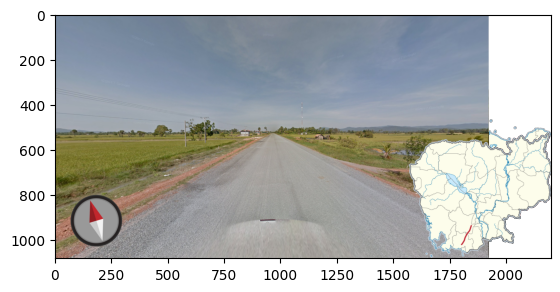

In [ ]:
query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/110.png"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    print(img_path)
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)